# **Final Project**

**Business Problem:**

**Healthcare providers face increasing challenges in managing the growing number of patients with chronic medical conditions. Prevention is more cost-effective than treatment, but identifying individuals at high risk before symptoms manifest is difficult due to the complex interplay of lifestyle, socio-economic, and genetic factors**

**The goal of this projects are:**

* **Predict the likelihood of developing chronic medical conditions based on individual attributes**
* **Design personalized prevention strategies for high-risk individuals.**

dataset : https://www.kaggle.com/datasets/anthonytherrien/depression-dataset

#### **Import Library and Load Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/depression_data.csv')
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


## **Data Preprocessing**

### **Data Understanding**

This dataset can be used to analyze factors that influence mental health or depression risk, such as lifestyle, habits, and health history.

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

This dataset has 413,768 rows with 16 columns.

Description column:
* Demographic variables:
  1. Name: The full name of the individual.
  2. Age: The age of the individual in years.
  3. Marital Status: The marital status of the individual. Possible values include Single, Married, Divorced, and Widowed.
  4. Education Level: The highest level of education attained by the individual. Possible values include High School, Associate Degree, Bachelor's Degree, Master's Degree, and PhD.
  
* Lifestyle variables:
  5. Alcohol Consumption: The level of alcohol consumption. Possible values include Low, Moderate, and High.
  6. Smoking Status: Indicates whether the individual is a smoker or not. Possible values are Smoker, Former and Non-smoker.
  7. Physical Activity Level: The level of physical activity undertaken by the individual. Possible values include Sedentary, Moderate, and Active.
  8. Dietary Habits: The dietary habits of the individual. Possible values include Healthy, Moderate, and Unhealthy.
  9. Sleep Patterns: The quality of sleep. Possible values include Good, Fair, and Poor.

* Social and Economic Variables:
  10. Number of Children: The number of children the individual has.
  11. Employment Status: The employment status of the individual. Possible values include Employed and Unemployed.
  12. Income: The annual income of the individual in USD.

* Health History Variables:
  13. History of Mental Illness: Whether the individual has a history of mental illness. Possible values are Yes and No.
  14. History of Substance Abuse: Whether the individual has a history of substance abuse. Possible values are Yes and No.
  15. Family History of Depression: Indicates if there is a family history of depression. Possible values are Yes and No.
  16. Chronic Medical Conditions: Whether the individual has chronic medical conditions. Possible values are Yes and No.

#### **Checking Data General and Unique Value**

In [5]:
data.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [6]:
data.describe(include='object').T

,count,unique,top,freq
Name,413768,196851,Michael Smith,198
Marital Status,413768,4,Married,240444
Education Level,413768,5,Bachelor's Degree,124329
Smoking Status,413768,3,Non-smoker,247416
Physical Activity Level,413768,3,Sedentary,176850
Employment Status,413768,2,Employed,265659
Alcohol Consumption,413768,3,Moderate,173440
Dietary Habits,413768,3,Unhealthy,170817
Sleep Patterns,413768,3,Fair,196789
History of Mental Illness,413768,2,No,287943


##### **Checking Unique Value Data**

In [7]:
feature = data.columns.to_list()
for i in feature:
   print(f'the number of unique values of {i} is {len(data[i].unique())}')
   values_counts = pd.DataFrame(data[i].value_counts())
   print(f'the values of the {i} are : \n{values_counts}')
   print('=========================================')

the number of unique values of Name is 196851
the values of the Name are : 
                 count
Name                  
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
...                ...
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1

[196851 rows x 1 columns]
the number of unique values of Age is 63
the values of the Age are : 
     count
Age       
42    6740
47    6700
43    6700
24    6695
52    6693
..     ...
18    6470
65    6449
76    6442
35    6429
21    6381

[63 rows x 1 columns]
the number of unique values of Marital Status is 4
the values of the Marital Status are : 
                 count
Marital Status        
Married         240444
Single           72110
Widowed          68485
Divorced         32729
the number of unique values of Education Level is 5
the values of the Education Level are : 
                    count
Education Leve

##### **Visualitation Numerical Column**

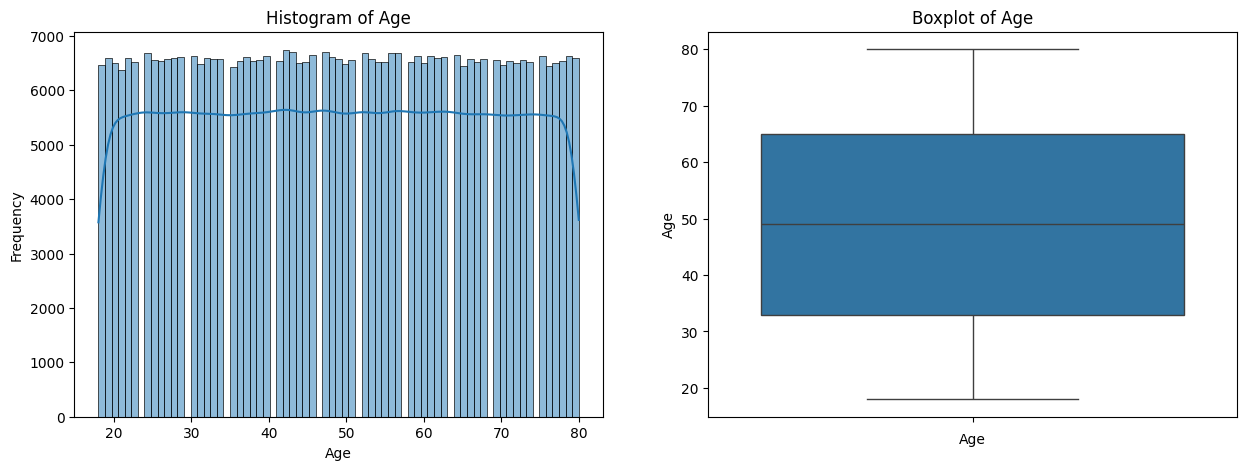

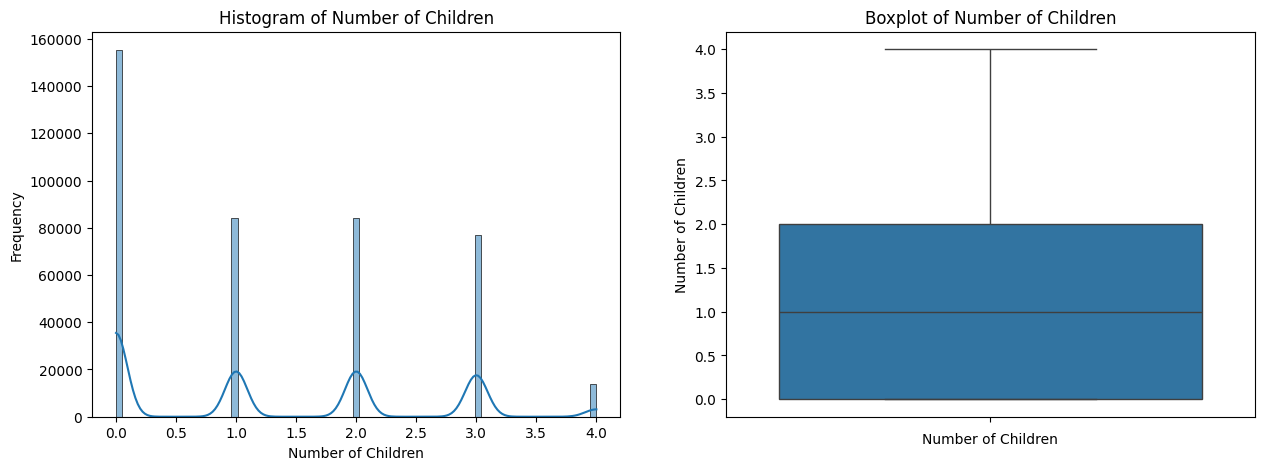

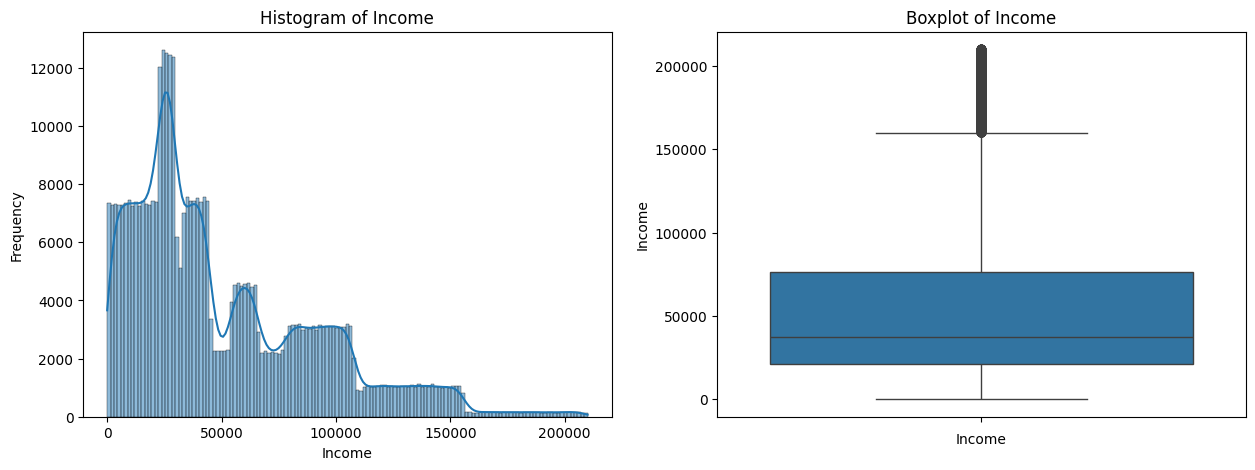

In [8]:
for column in data.columns:
    if data[column].dtype == 'int64' or data[column].dtype == 'float64':
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.subplot(1, 2, 2)
        sns.boxplot(data[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

### **Data Cleaning**

In [9]:
# Mengecek jumlah missing value
data.isnull().sum()

,0
Name,0
Age,0
Marital Status,0
Education Level,0
Number of Children,0
Smoking Status,0
Physical Activity Level,0
Employment Status,0
Income,0
Alcohol Consumption,0


In [10]:
#duplicate data cek
duplicate = data.duplicated().sum()
print("Jumlah data duplikat: ", duplicate)

Jumlah data duplikat:  0


**Missing Value**

In [11]:
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100
missing_values_df = pd.DataFrame({'Jumlah Missing Value': missing_values, 'Persentase Missing Value': missing_values_percentage})
missing_values_df

,Jumlah Missing Value,Persentase Missing Value
Name,0,0.0
Age,0,0.0
Marital Status,0,0.0
Education Level,0,0.0
Number of Children,0,0.0
Smoking Status,0,0.0
Physical Activity Level,0,0.0
Employment Status,0,0.0
Income,0,0.0
Alcohol Consumption,0,0.0


### **Feature Engineering**

#### **Encode Categorical**

In [12]:
from sklearn.preprocessing import LabelEncoder
#object & category
categorical_cols = data.select_dtypes(include=['object','category']).columns
label_encoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)
data.head().T

,0,1,2,3,4
Name,37154.00,78274.00,169167.00,34046.00,133232.00
Age,31.00,55.00,78.00,58.00,18.00
Marital Status,1.00,1.00,3.00,0.00,2.00
Education Level,1.00,2.00,3.00,3.00,2.00
Number of Children,2.00,1.00,1.00,3.00,0.00
Smoking Status,2.00,2.00,2.00,2.00,2.00
Physical Activity Level,0.00,2.00,2.00,1.00,2.00
Employment Status,1.00,0.00,0.00,1.00,1.00
Income,26265.67,42710.36,125332.79,9992.78,8595.08
Alcohol Consumption,2.00,0.00,1.00,2.00,1.00


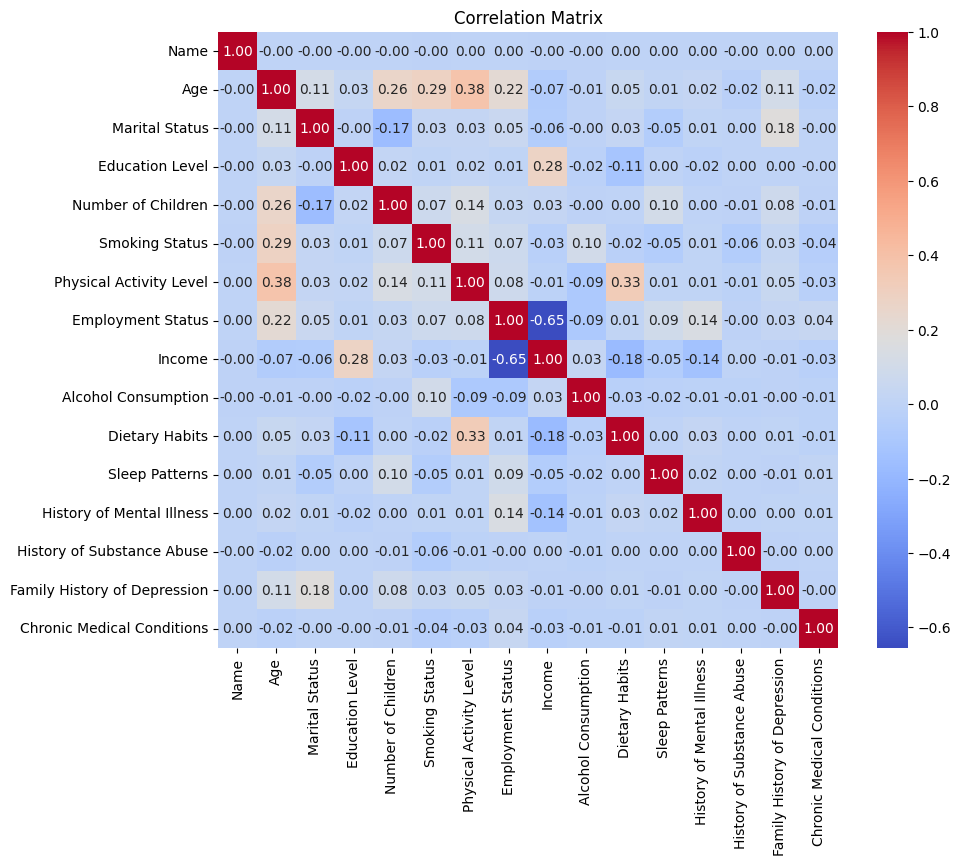

In [13]:
#cek korelasi heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### **New Feature**

In [14]:
#age category
data['age_category'] = pd.cut(data['Age'],bins=[0,19,65,81],labels=['teens(0-19)','adults(20-65)','seniors(66-100)'])
#catogorical income
#data['income_category'] = pd.cut(data['Income'],bins=[0,49999,100000,200000],labels=['low income','medium income','high income'])
#score
data['Lifestyle_score'] = data['Alcohol Consumption'] + data['Smoking Status'] + data['Physical Activity Level'] + data['Dietary Habits'] + data['Sleep Patterns']
data['Health_score'] = data['History of Mental Illness'] + data['History of Substance Abuse'] + data['Family History of Depression'] + data['Chronic Medical Conditions']
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,age_category,Lifestyle_score,Health_score
0,37154,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1,1,adults(20-65),5,3
1,78274,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0,1,adults(20-65),6,2
2,169167,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1,0,seniors(66-100),8,1
3,34046,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0,0,adults(20-65),8,0
4,133232,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1,1,teens(0-19),6,3


In [15]:
#drop data
data.drop(['Name',
           'Age',
           'Alcohol Consumption',
           'Smoking Status',
           'Physical Activity Level',
           'Dietary Habits',
           'Sleep Patterns',
           'History of Mental Illness',
           'History of Substance Abuse',
           'Family History of Depression'] ,axis=1,inplace=True)
data.head()

,Marital Status,Education Level,Number of Children,Employment Status,Income,Chronic Medical Conditions,age_category,Lifestyle_score,Health_score
0,1,1,2,1,26265.67,1,adults(20-65),5,3
1,1,2,1,0,42710.36,1,adults(20-65),6,2
2,3,3,1,0,125332.79,0,seniors(66-100),8,1
3,0,3,3,1,9992.78,0,adults(20-65),8,0
4,2,2,0,1,8595.08,1,teens(0-19),6,3


In [16]:
feature2 = data.columns.to_list()
for i in feature2:
   print(f'the number of unique values of {i} is {len(data[i].unique())}')
   values_counts = pd.DataFrame(data[i].value_counts())
   print(f'the values of the {i} are : \n{values_counts}')
   print('=========================================')

the number of unique values of Marital Status is 4
the values of the Marital Status are : 
                 count
Marital Status        
1               240444
2                72110
3                68485
0                32729
the number of unique values of Education Level is 5
the values of the Education Level are : 
                  count
Education Level        
1                124329
2                118927
0                 79999
3                 73768
4                 16745
the number of unique values of Number of Children is 5
the values of the Number of Children are : 
                     count
Number of Children        
0                   155232
2                    83961
1                    83925
3                    76974
4                    13676
the number of unique values of Employment Status is 2
the values of the Employment Status are : 
                    count
Employment Status        
0                  265659
1                  148109
the number of unique 

In [17]:
from sklearn.preprocessing import LabelEncoder
#object & category
categorical_cols1 = data.select_dtypes(include=['object','category']).columns
label_encoder = LabelEncoder()
data[categorical_cols1] = data[categorical_cols1].apply(label_encoder.fit_transform)
data.head()

,Marital Status,Education Level,Number of Children,Employment Status,Income,Chronic Medical Conditions,age_category,Lifestyle_score,Health_score
0,1,1,2,1,26265.67,1,0,5,3
1,1,2,1,0,42710.36,1,0,6,2
2,3,3,1,0,125332.79,0,1,8,1
3,0,3,3,1,9992.78,0,0,8,0
4,2,2,0,1,8595.08,1,2,6,3


In [18]:
feature3 = data.columns.to_list()
for i in feature3:
   print(f'the number of unique values of {i} is {len(data[i].unique())}')
   values_counts = pd.DataFrame(data[i].value_counts())
   print(f'the values of the {i} are : \n{values_counts}')
   print('=========================================')

the number of unique values of Marital Status is 4
the values of the Marital Status are : 
                 count
Marital Status        
1               240444
2                72110
3                68485
0                32729
the number of unique values of Education Level is 5
the values of the Education Level are : 
                  count
Education Level        
1                124329
2                118927
0                 79999
3                 73768
4                 16745
the number of unique values of Number of Children is 5
the values of the Number of Children are : 
                     count
Number of Children        
0                   155232
2                    83961
1                    83925
3                    76974
4                    13676
the number of unique values of Employment Status is 2
the values of the Employment Status are : 
                    count
Employment Status        
0                  265659
1                  148109
the number of unique 

#### **Correlation Column**

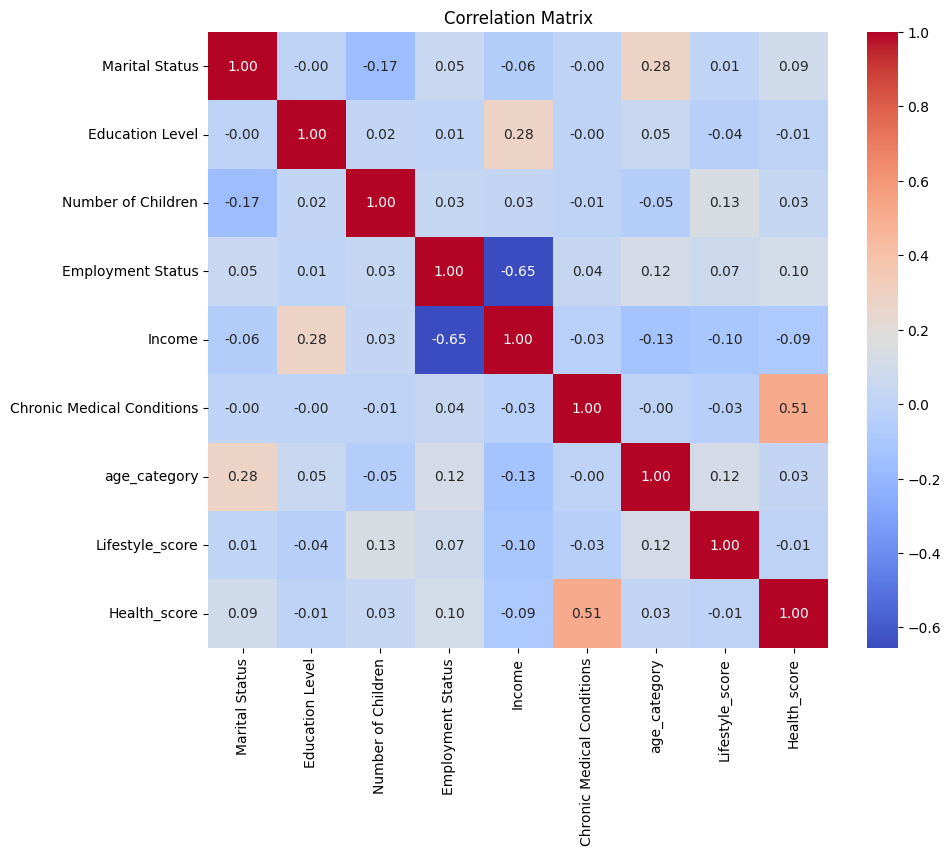

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
correlation  = data.corr()
correlation

,Marital Status,Education Level,Number of Children,Employment Status,Income,Chronic Medical Conditions,age_category,Lifestyle_score,Health_score
Marital Status,1.000000,-0.004018,-0.166820,0.051218,-0.058978,-0.000261,0.279532,0.006525,0.090899
Education Level,-0.004018,1.000000,0.017454,0.008094,0.280200,-0.000803,0.048137,-0.038998,-0.007432
Number of Children,-0.166820,0.017454,1.000000,0.030502,0.028737,-0.006997,-0.052931,0.133910,0.032752
Employment Status,0.051218,0.008094,0.030502,1.000000,-0.654881,0.042413,0.117551,0.071739,0.102312
Income,-0.058978,0.280200,0.028737,-0.654881,1.000000,-0.028427,-0.129938,-0.101219,-0.086140
Chronic Medical Conditions,-0.000261,-0.000803,-0.006997,0.042413,-0.028427,1.000000,-0.002611,-0.034323,0.513893
age_category,0.279532,0.048137,-0.052931,0.117551,-0.129938,-0.002611,1.000000,0.118282,0.029772
Lifestyle_score,0.006525,-0.038998,0.133910,0.071739,-0.101219,-0.034323,0.118282,1.000000,-0.008062
Health_score,0.090899,-0.007432,0.032752,0.102312,-0.086140,0.513893,0.029772,-0.008062,1.000000


### **Feature Selection**

#### **VIF**

In [21]:
correlation_sorted = correlation.unstack().sort_values(ascending=False)
correlation_sorted

,,0
Marital Status,Marital Status,1.000000
Education Level,Education Level,1.000000
Lifestyle_score,Lifestyle_score,1.000000
age_category,age_category,1.000000
Chronic Medical Conditions,Chronic Medical Conditions,1.000000
...,...,...
Income,age_category,-0.129938
Marital Status,Number of Children,-0.166820
Number of Children,Marital Status,-0.166820
Income,Employment Status,-0.654881


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Marital Status              413768 non-null  int64  
 1   Education Level             413768 non-null  int64  
 2   Number of Children          413768 non-null  int64  
 3   Employment Status           413768 non-null  int64  
 4   Income                      413768 non-null  float64
 5   Chronic Medical Conditions  413768 non-null  int64  
 6   age_category                413768 non-null  int64  
 7   Lifestyle_score             413768 non-null  int64  
 8   Health_score                413768 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 28.4 MB


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

# Select only true numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
vif_data = calculate_vif(data[numerical_cols])
print(vif_data)


                    variables       VIF
0              Marital Status  3.741057
1             Education Level  3.473870
2          Number of Children  2.185240
3           Employment Status  2.610748
4                      Income  4.304066
5  Chronic Medical Conditions  2.032579
6                age_category  1.492068
7             Lifestyle_score  6.586137
8                Health_score  3.677181


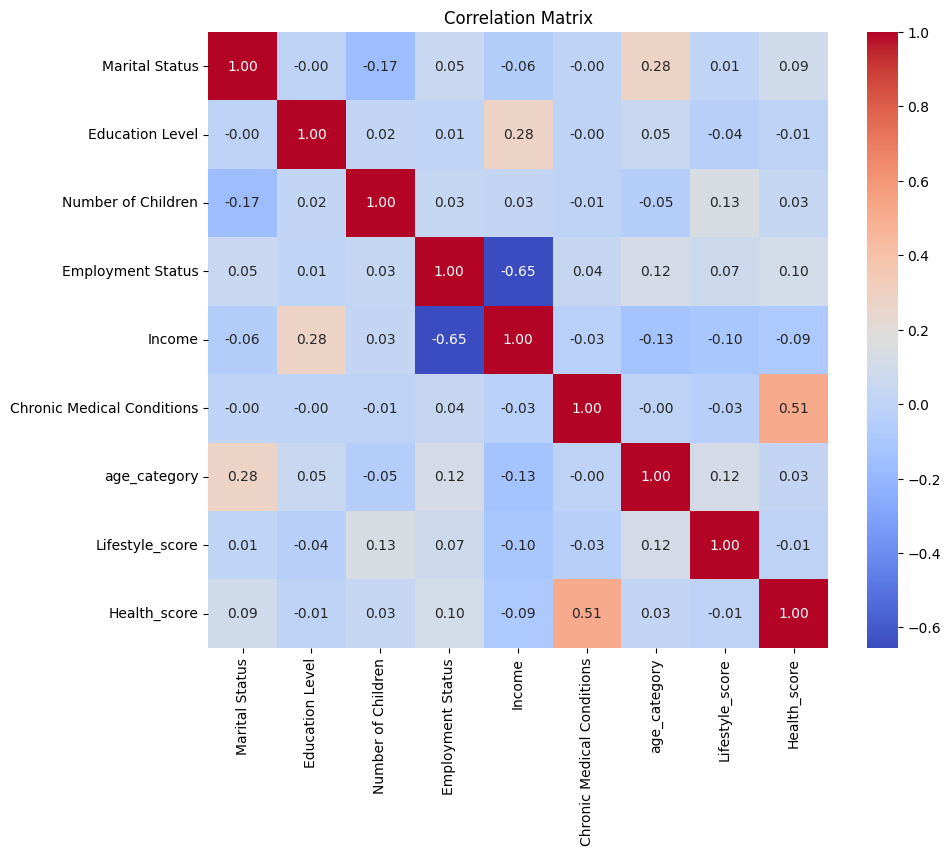

In [24]:
#Visualitation
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### **Split Data**

In [25]:
from sklearn.model_selection import train_test_split
#Target Variable
X = data.drop('Chronic Medical Conditions', axis=1)
y = data['Chronic Medical Conditions']

#split train, val, and test (80 train, 10 validation, 10 test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (331014, 8) (331014,)
Validation set shape: (41377, 8) (41377,)
Test set shape: (41377, 8) (41377,)


## **EDA**

### **Distribution Target Variable**

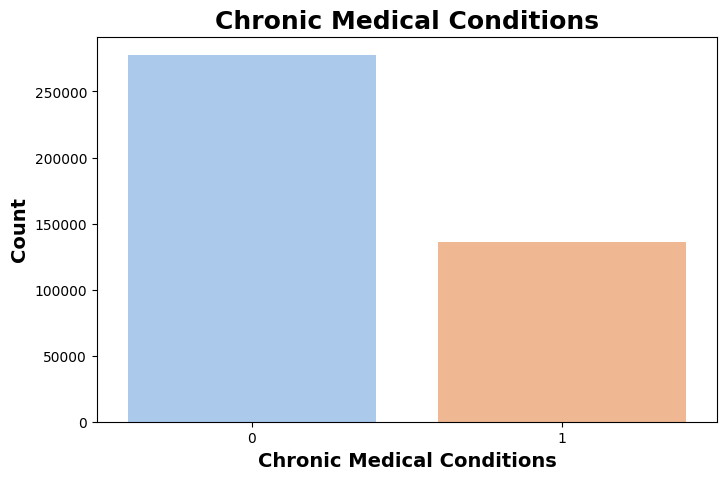

In [26]:
#chronic medical condition visualization with data train
plt.figure(figsize=(8,5))
sns.countplot(x='Chronic Medical Conditions',data=data,palette='pastel')
plt.title('Chronic Medical Conditions',fontsize=18,weight='bold')
plt.xlabel('Chronic Medical Conditions',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.show()

### **Target Variable Overview**

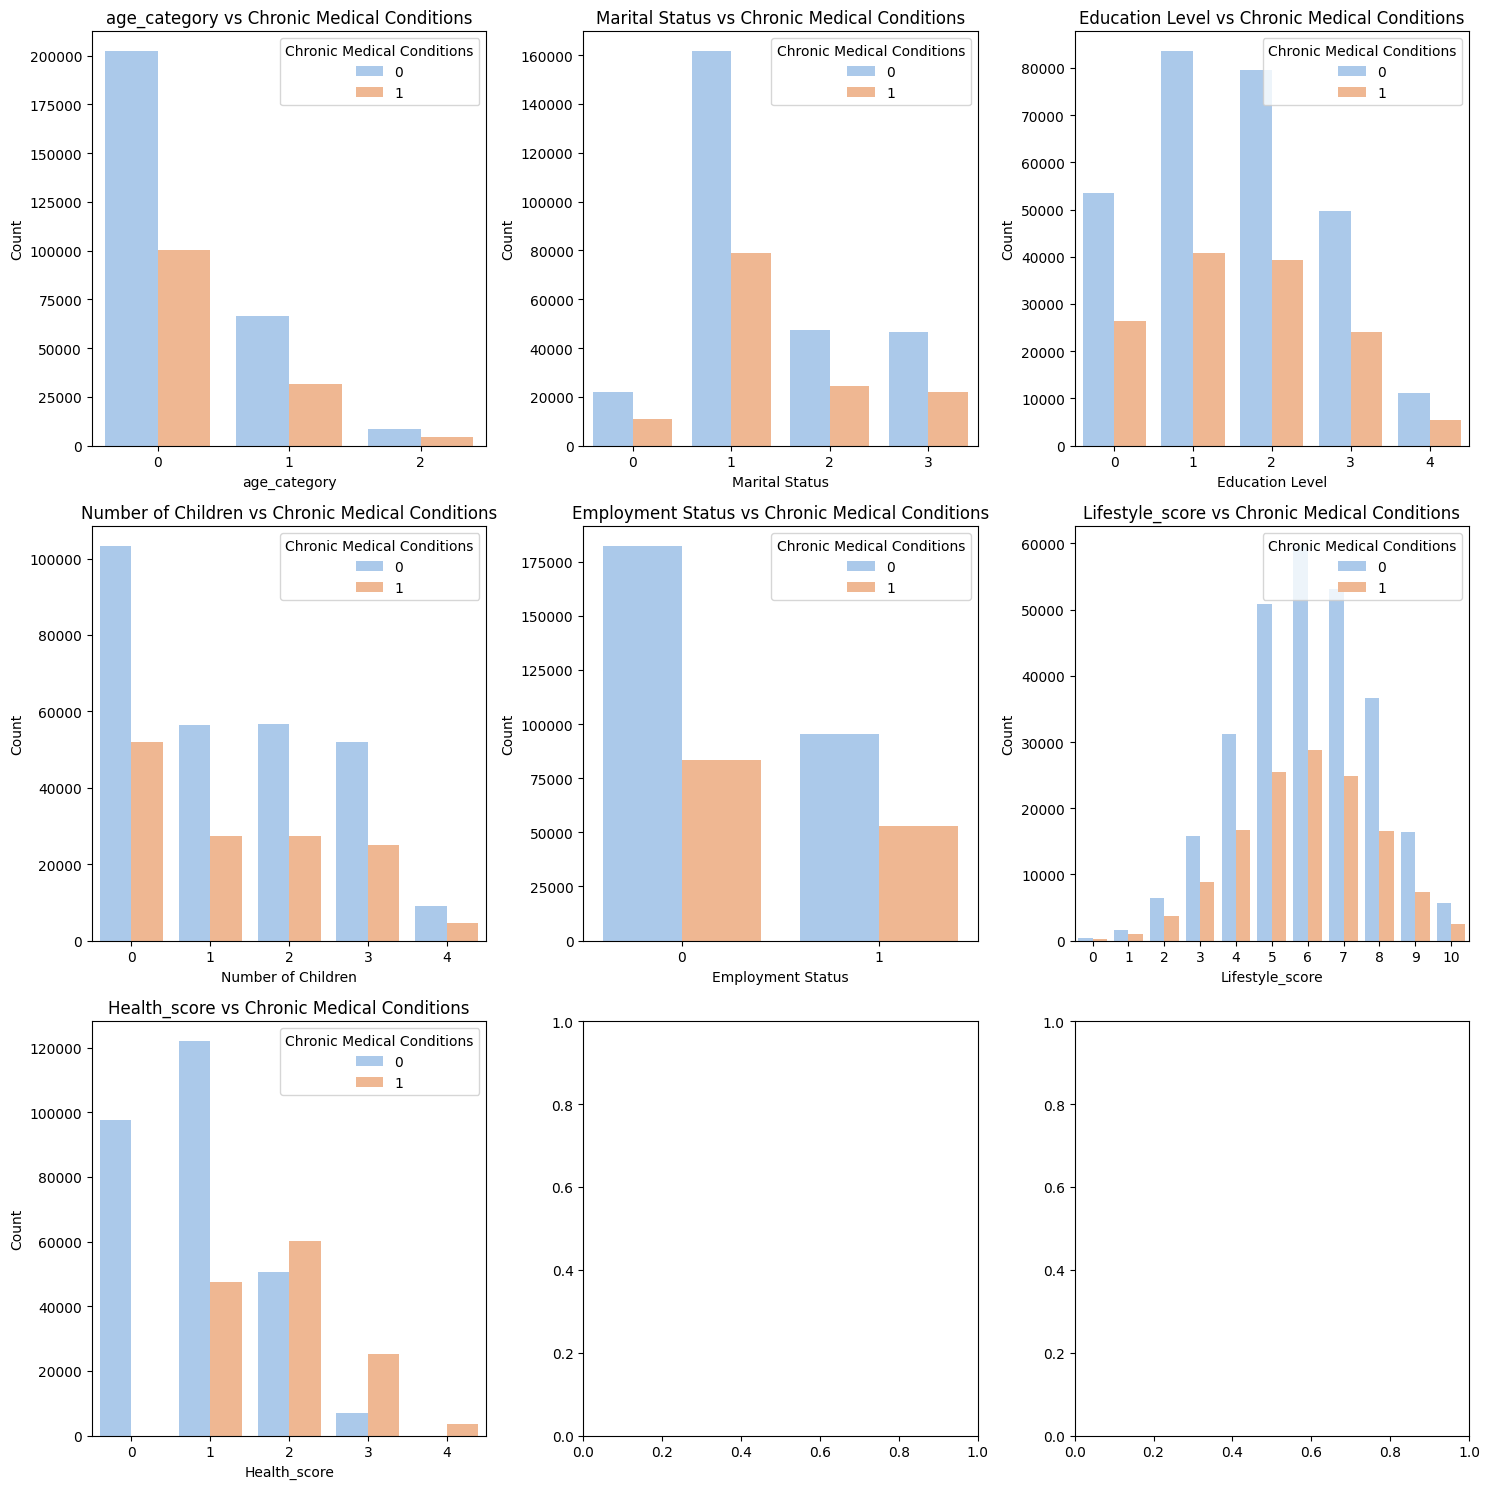

In [27]:
# target variable with the age_category, education level, smoking status, physical activity level, wmployment status, diatery habits, sleep pattern, history mental ilness, history of substance abuse, family history of depression, lifestyle score, health score

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
categorical_cols = [
    'age_category', 'Marital Status', 'Education Level', 'Number of Children',
    'Employment Status', 'Lifestyle_score', 'Health_score',
]

for i, col in enumerate(categorical_cols):
    if col in data.columns:  # Ensure column exists in the dataset
        sns.countplot(x=col, hue='Chronic Medical Conditions', data=data, ax=axes[i], palette='pastel')
        axes[i].set_title(f'{col} vs Chronic Medical Conditions')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Chronic Medical Conditions', loc='upper right')

# Tight layout and show plot
plt.tight_layout()
plt.show()

### **Income on Target Variable**

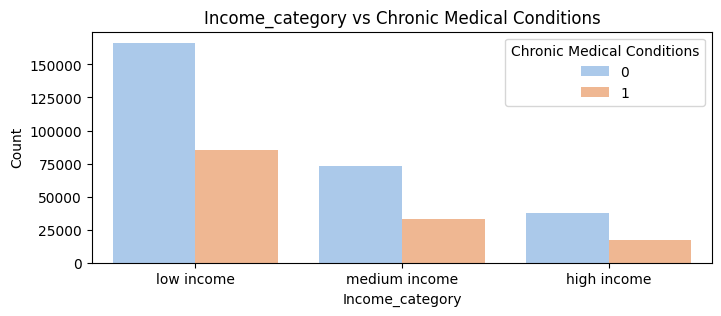

In [28]:
#create income category to match target variable
categorical_income = data.copy()
categorical_income['Income_category'] = pd.cut(data['Income'],bins=[0,49999,100000,200000],labels=['low income','medium income','high income'])

#visualisasi dengan target variable

plt.figure(figsize=(8, 3))
sns.countplot(x='Income_category', hue='Chronic Medical Conditions', data=categorical_income, palette='pastel')
plt.title('Income_category vs Chronic Medical Conditions')
plt.xlabel('Income_category')
plt.ylabel('Count')
plt.legend(title='Chronic Medical Conditions', loc='upper right')
plt.show()

### **Health Score on Target Variable**

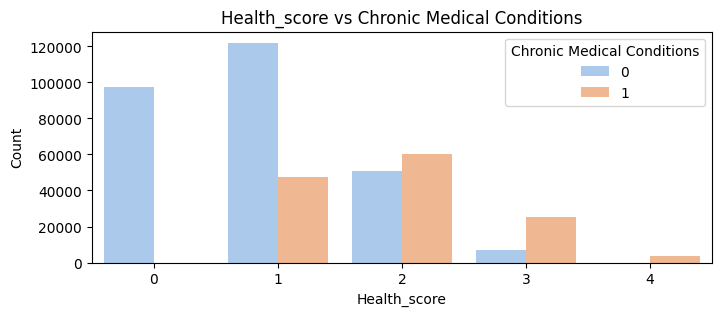

In [29]:
plt.figure(figsize=(8, 3))
sns.countplot(x='Health_score', hue='Chronic Medical Conditions', data=categorical_income, palette='pastel')
plt.title('Health_score vs Chronic Medical Conditions')
plt.xlabel('Health_score')
plt.ylabel('Count')
plt.legend(title='Chronic Medical Conditions', loc='upper right')
plt.show()

## **Machine Learning Model**

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### **Scalling**

In [31]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

### **XGB**

In [32]:
modelxgb = XGBClassifier()
modelxgb.fit(X_train_scaled, y_train)
y_pred = modelxgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7457283031635933
              precision    recall  f1-score   support

           0       0.79      0.84      0.82     27729
           1       0.63      0.55      0.59     13648

    accuracy                           0.75     41377
   macro avg       0.71      0.70      0.70     41377
weighted avg       0.74      0.75      0.74     41377

[[23316  4413]
 [ 6108  7540]]


### **Random Forest**

In [33]:
modelrf = RandomForestClassifier()
modelrf.fit(X_train_scaled, y_train)
y_pred = modelrf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.681417212461029
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     27729
           1       0.52      0.51      0.51     13648

    accuracy                           0.68     41377
   macro avg       0.64      0.64      0.64     41377
weighted avg       0.68      0.68      0.68     41377

[[21204  6525]
 [ 6657  6991]]


### **Logistic Regression**

In [34]:
modellr = LogisticRegression()
modellr.fit(X_train_scaled, y_train)
y_pred = modellr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7470817120622568
              precision    recall  f1-score   support

           0       0.81      0.82      0.81     27729
           1       0.62      0.60      0.61     13648

    accuracy                           0.75     41377
   macro avg       0.71      0.71      0.71     41377
weighted avg       0.75      0.75      0.75     41377

[[22704  5025]
 [ 5440  8208]]


### **Decision Tree**

In [35]:
modeldt = DecisionTreeClassifier()
modeldt.fit(X_train_scaled, y_train)
y_pred = modeldt.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6720158542185272
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     27729
           1       0.50      0.51      0.51     13648

    accuracy                           0.67     41377
   macro avg       0.63      0.63      0.63     41377
weighted avg       0.67      0.67      0.67     41377

[[20880  6849]
 [ 6722  6926]]


### **KNN**

In [36]:
modelknn = KNeighborsClassifier()
modelknn.fit(X_train_scaled, y_train)
y_pred = modelknn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7082437102738236
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     27729
           1       0.57      0.50      0.53     13648

    accuracy                           0.71     41377
   macro avg       0.67      0.66      0.66     41377
weighted avg       0.70      0.71      0.70     41377

[[22481  5248]
 [ 6824  6824]]


## **Evaluation**

### **Tuning Thresholds**

In [37]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score
#combine all model for search best treshold
models = {
    'Random Forest': modelrf,
    'Logistic Regression': modellr,
    'Decision Tree': modeldt,
    'K-Nearest Neighbors': modelknn,
    'XGBoost': modelxgb
}

for model_name, model in models.items():
    y_prob = cross_val_predict(model, X_test_scaled, y_test, cv=5, method='predict_proba')
    precision_scores, recall_scores, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
    f1_scores = 2 * (precision_scores * recall_scores) / (precision_scores + recall_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Best Threshold for {model_name}: {best_threshold}")
    y_pred = (y_prob[:, 1] >= best_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Precision for {model_name}: {precision}")
    print(f"Recall for {model_name}: {recall}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("======================================================================")

Best Threshold for Random Forest: 0.14
Accuracy for Random Forest: 0.6307127147932426
Precision for Random Forest: 0.4670781893004115
Recall for Random Forest: 0.8482561547479485
              precision    recall  f1-score   support

           0       0.88      0.52      0.66     27729
           1       0.47      0.85      0.60     13648

    accuracy                           0.63     41377
   macro avg       0.67      0.69      0.63     41377
weighted avg       0.74      0.63      0.64     41377

[[14520 13209]
 [ 2071 11577]]
Best Threshold for Logistic Regression: 0.25446649067145466
Accuracy for Logistic Regression: 0.7242912729294052
Precision for Logistic Regression: 0.5655968138690406
Recall for Logistic Regression: 0.7075762016412661
              precision    recall  f1-score   support

           0       0.84      0.73      0.78     27729
           1       0.57      0.71      0.63     13648

    accuracy                           0.72     41377
   macro avg       0.70    

### **Matrix Evaluation**

In [38]:
#Evaluasi All model
models = {
    'Random Forest': modelrf,
    'Logistic Regression': modellr,
    'Decision Tree': modeldt,
    'K-Nearest Neighbors': modelknn,
    'XGBoost': modelxgb
}

evaluation_results = []

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': classification_rep['weighted avg']['precision'],
        'Recall': classification_rep['weighted avg']['recall'],
        'F1-Score': classification_rep['weighted avg']['f1-score'],
    })

evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.681417,0.680639,0.681417,0.681021
1,Logistic Regression,0.747082,0.745212,0.747082,0.746069
2,Decision Tree,0.672016,0.672794,0.672016,0.672399
3,K-Nearest Neighbors,0.708244,0.700555,0.708244,0.703336
4,XGBoost,0.745728,0.739108,0.745728,0.741081


In [39]:
#with threshold
models = {
    'Random Forest': modelrf,
    'Logistic Regression': modellr,
    'Decision Tree': modeldt,
    'K-Nearest Neighbors': modelknn,
    'XGBoost': modelxgb
}

evaluation_results = []

for model_name, model in models.items():
    y_prob = cross_val_predict(model, X_test_scaled, y_test, cv=5, method='predict_proba')
    precision_scores, recall_scores, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
    f1_scores = 2 * (precision_scores * recall_scores) / (precision_scores + recall_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    y_pred = (y_prob[:, 1] >= best_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': classification_rep['weighted avg']['precision'],
        'Recall': classification_rep['weighted avg']['recall'],
        'F1-Score': classification_rep['weighted avg']['f1-score'],
        'Best Threshold': best_threshold
    })

evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df

,Model,Accuracy,Precision,Recall,F1-Score,Best Threshold
0,Random Forest,0.628199,0.743889,0.628199,0.634623,0.130000
1,Logistic Regression,0.724291,0.746662,0.724291,0.730587,0.254466
2,Decision Tree,0.671992,0.672273,0.671992,0.672131,1.000000
3,K-Nearest Neighbors,0.599753,0.764123,0.599753,0.598600,0.200000
4,XGBoost,0.711482,0.737802,0.711482,0.718565,0.346942


### **Confusion Matrix**

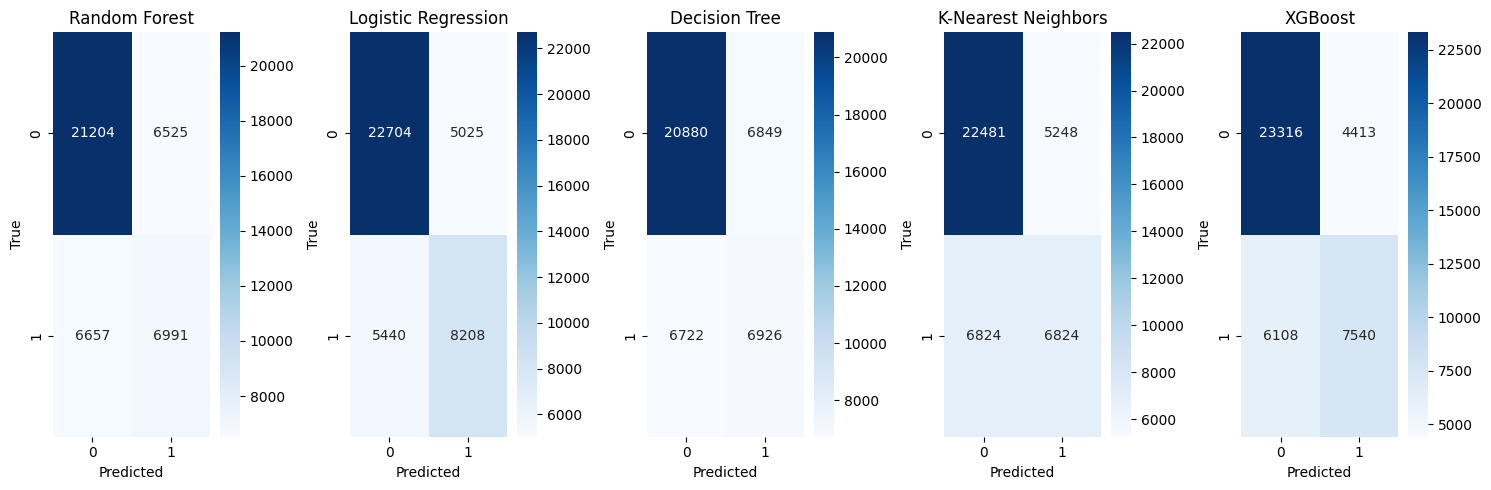

In [40]:
#Visualitation Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(models), figsize=(15, 5))

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(model_name)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')

plt.tight_layout()
plt.show()

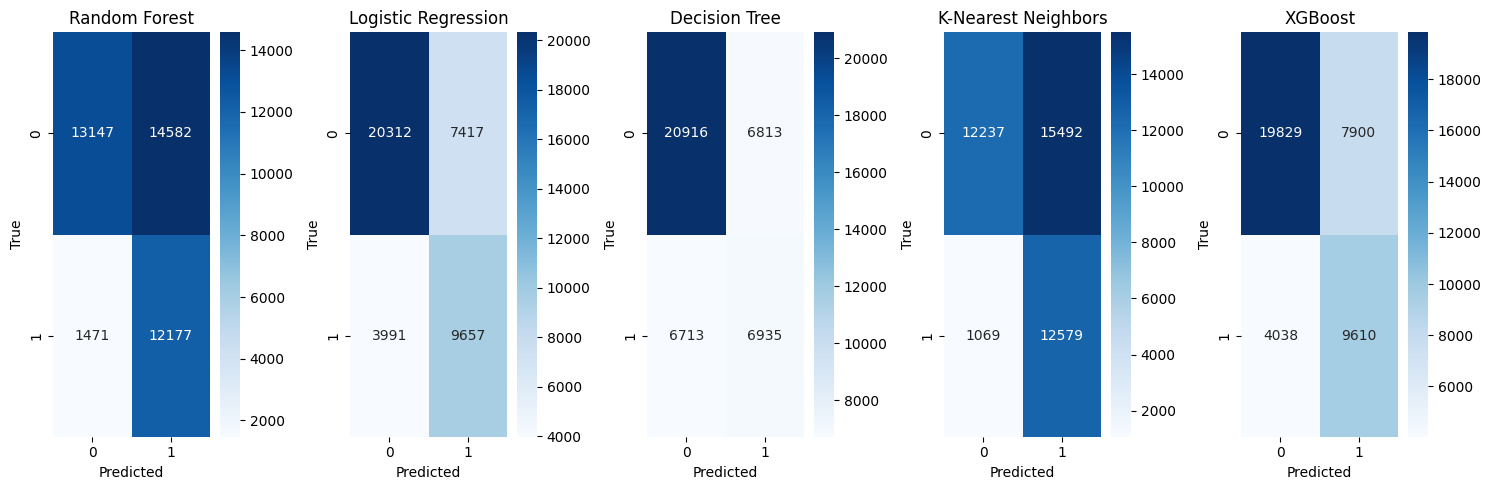

In [41]:
#with thresholds
fig, axs = plt.subplots(1, len(models), figsize=(15, 5))

for i, (model_name, model) in enumerate(models.items()):
    y_prob = cross_val_predict(model, X_test_scaled, y_test, cv=5, method='predict_proba')
    precision_scores, recall_scores, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
    f1_scores = 2 * (precision_scores * recall_scores) / (precision_scores + recall_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    y_pred = (y_prob[:, 1] >= best_threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(model_name)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')

plt.tight_layout()
plt.show()

### **Hyperparameter Tuning**

In [42]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Models and their parameter grids
model_params = {
    'Random Forest': {
        'model': modelrf,
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
    },
    'Logistic Regression': {
        'model': modellr,
        'params': {'C': [0.1, 1, 10], 'penalty': ['l2']}
    },
    'Decision Tree': {
        'model': modeldt,
        'params': {'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
    },
    'K-Nearest Neighbors': {
        'model': modelknn,
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    },
    'XGBoost': {
        'model': modelxgb,
        'params': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200]}
    }
}

# Custom scorer to find best F1-score with threshold optimization
def f1_scorer_with_threshold(estimator, X_test_scaled, y_test):
    y_prob = estimator.predict_proba(X_test_scaled)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    return np.max(f1_scores)  # Return the best F1-score

# Tuning and evaluating models
for model_name, config in model_params.items():
    print(f"Hyperparameter tuning for {model_name}")

    # GridSearchCV with custom scorer
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=make_scorer(f1_scorer_with_threshold, needs_proba=True),
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(X_train_scaled, y_train)

    # Best parameters
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Predict probabilities on test set
    y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

    # Find best threshold on test set
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[np.argmax(f1_scores)]

    # Evaluate on test set with best threshold
    y_test_pred = (y_test_prob >= best_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision_metric = precision_score(y_test, y_test_pred)
    recall_metric = recall_score(y_test, y_test_pred)

    print(f"Best Threshold for {model_name}: {best_threshold}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision_metric}")
    print(f"Recall: {recall_metric}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("======================================================================")


Hyperparameter tuning for Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for Random Forest: {'max_depth': 5, 'n_estimators': 100}
Best Threshold for Random Forest: 0.2705276200134881
Accuracy: 0.7195785098001305
Precision: 0.558438589472481
Recall: 0.7159290738569754
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78     27729
           1       0.56      0.72      0.63     13648

    accuracy                           0.72     41377
   macro avg       0.70      0.72      0.70     41377
weighted avg       0.75      0.72      0.73     41377

Confusion Matrix:
[[20003  7726]
 [ 3877  9771]]
Hyperparameter tuning for Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Threshold for Logistic Regression: 0.2541203668299267
Accuracy: 0.7244846170577858
Precision: 0.56621112158341

In [45]:
#create output to dataframe
import pandas as pd
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix, classification_report

# Initialize a list to store the results
results = []

# Tuning and evaluating models
for model_name, config in model_params.items():
    print(f"Hyperparameter tuning for {model_name}")

    # GridSearchCV with custom scorer
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=make_scorer(f1_scorer_with_threshold, needs_proba=True),
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(X_train_scaled, y_train)

    # Best parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predict probabilities on test set
    y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

    # Find best threshold on test set
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[np.argmax(f1_scores)]

    # Evaluate on test set with best threshold
    y_test_pred = (y_test_prob >= best_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision_metric = precision_score(y_test, y_test_pred)
    recall_metric = recall_score(y_test, y_test_pred)

    # Append the results to the list
    results.append({
        "Model": model_name,
        "Best Parameters": best_params,
        "Best Threshold": best_threshold,
        "Accuracy": accuracy,
        "Precision": precision_metric,
        "Recall": recall_metric

    })

    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Threshold for {model_name}: {best_threshold}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision_metric}")
    print(f"Recall: {recall_metric}")
    print("======================================================================")

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df

Hyperparameter tuning for Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for Random Forest: {'max_depth': 5, 'n_estimators': 100}
Best Threshold for Random Forest: 0.264859092356561
Accuracy: 0.7144548903980472
Precision: 0.5505543604170114
Recall: 0.7313159437280188
Hyperparameter tuning for Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Threshold for Logistic Regression: 0.2541203668299267
Accuracy: 0.7244846170577858
Precision: 0.5662111215834119
Recall: 0.7042790152403282
Hyperparameter tuning for Decision Tree
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Best Threshold for Decision Tree: 0.3189420748742783
Accuracy: 0.7137781859487154
Precision: 0.549579739603362
Recall: 0.7330011723329426
Hyperparameter tuning for K-Nearest Neighbors
Fitting 5

,Model,Best Parameters,Best Threshold,Accuracy,Precision,Recall
0,Random Forest,"{'max_depth': 5, 'n_estimators': 100}",0.264859,0.714455,0.550554,0.731316
1,Logistic Regression,"{'C': 0.1, 'penalty': 'l2'}",0.254120,0.724485,0.566211,0.704279
2,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}",0.318942,0.713778,0.549580,0.733001
3,K-Nearest Neighbors,"{'n_neighbors': 3, 'weights': 'uniform'}",0.333333,0.631873,0.467145,0.825103
4,XGBoost,"{'learning_rate': 0.01, 'n_estimators': 100}",0.317353,0.690263,0.520025,0.791545


### **Feature Importance**

In [ ]:
#feature important hyperparameter tuning best all model
feature_importances = {
    'Random Forest': modelrf.feature_importances_,
    'Logistic Regression': modellr.coef_[0],
    'Decision Tree': modeldt.feature_importances_,
    'XGBoost': modelxgb.feature_importances_
}

for model_name, importances in feature_importances.items():
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"Feature Importance for {model_name}:")
    print(feature_importance_df)
    print("======================================================================")

In [ ]:
#visualisasi
for model_name, importances in feature_importances.items():
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

Best Model is **Random Forest**:

1. Income (66.30%)
  * Significance: The most dominant factor, indicating that income level influences risk through access to health services, diet, or lifestyle.
  * Implication: Low income = higher risk.

2. Health_score (26.70%)

  * Significance: Direct indicator of physical/mental health conditions.
  * Implication: Low score = higher risk.

3. Lifestyle_score (2.97%)

  * Significance: Habits such as diet, exercise, or smoking/alcohol consumption have an effect, although small.
  * Implication: Healthy lifestyle = reduced risk.

4. Education Level (1.46%)

  * Significance: Plays a small role, related to health awareness and lifestyle decision making.
  * Implication: Low education = less aware of the importance of prevention.

5. Number of Children (1.29%)

  * Significance: Financial burden/stress from a large family can affect health.
  * Implication: Large family = higher risk.

6. Marital Status (0.80%), Age_category (0.31%), Employment Status (0.15%)

  * Significance: Small effect, relevant for additional segmentation.
  * Implication: Secondary factor for health risk

## **Recomendation**

1. Focus on Low-Income Segments
  * Strategy:
  Prioritize low-income individuals in prevention programs, such as providing subsidized or free healthcare services.
  * Operational Recommendations:
  Launch health education programs and regular check-ups for individuals from low-income groups.
2. Improve Health Scores through Preventive Programs
  * Strategy:
  Identify individuals with low health scores and offer data-based interventions, such as exercise programs, diets, or regular health check-ups.
  * Operational Recommendations:
  Establish partnerships with gyms, nutritionists, or health platforms to support customers in improving their health scores.
3. Promote a Healthy Lifestyle
  * Strategy:
  A healthy lifestyle campaign, such as reducing smoking and alcohol consumption, and increasing exercise.
  * Operational Recommendations:
  Hold healthy lifestyle seminars and workshops for the community.